# Milestone 01
```
Nama    : Aziz Dharmawan Apray
FTDS Batch 008
```

## Description

### Objective
```
Mengetahui kecenderungan data dengan mengenali kegiatan pembelian oleh pengunjung e-commerce melalui konsep central of tendency serta hypotesis testing dan A/B testing.
```

### Problem Statement
```
- Menghitung mean, median, dan modus untuk mengetahui central of tendency data
- Menerapkan hypotesis testing dan A/B testing pada data
```

## Working Area

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Data Loading

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Preprocessing

In [3]:
# check missing value
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [4]:
# check duplicate value
df.duplicated().sum()

0

In [5]:
# convert Date dtyp to datetime4
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [7]:
# copy datasets
sales = df.copy()
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Data Processing

#### Exploratory Data Analysis

**Best Selling Product Line**

In [8]:

sales.groupby('Product line')['Quantity'].sum()

Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'Best Selling Product Line')

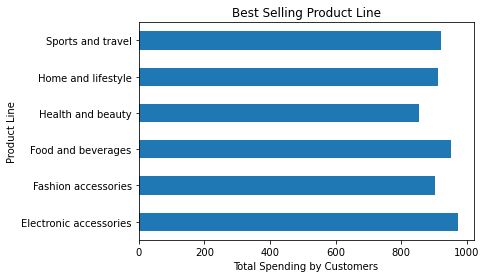

In [9]:
sales.groupby('Product line')['Quantity'].sum().plot(kind='barh')

plt.xlabel('Total Spending by Customers')
plt.ylabel('Product Line')
plt.title('Best Selling Product Line')

Aksesoris elektronik serta produk makanan dan minuman menjadi lini produk dengan volume pembelian terbanyak oleh customer.

**Customers Favorite Payment Method**

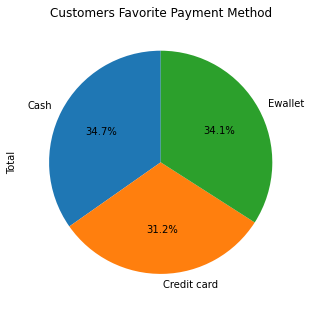

In [10]:
sales.groupby('Payment')['Total'].sum().plot(kind='pie', figsize=(5,10), autopct='%1.1f%%', startangle=90)

plt.title('Customers Favorite Payment Method')
plt.show()

Tidak ada perbedaan yang signifikan diantara ketiganya, namun metode pembayaran cash sedikit lebih sering digunakan.

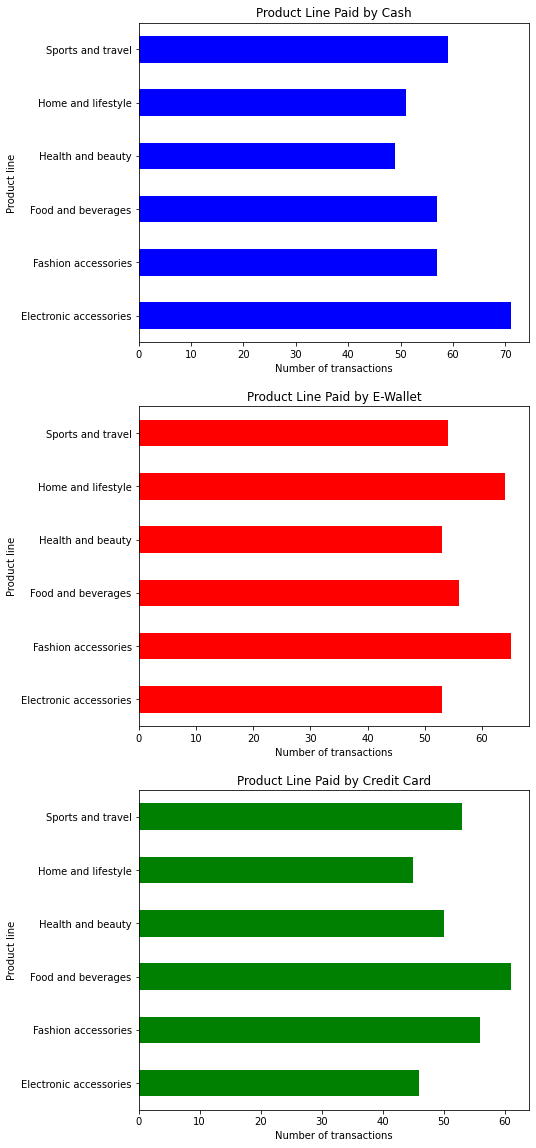

In [11]:
fig,ax = plt.subplots(nrows=3, figsize=(7,20))

cash = sales[sales['Payment'] == 'Cash']
pay_cash = cash['Product line'].value_counts().sort_index()
pay_cash.plot(kind='barh', color='blue', ax=ax[0])

ewallet = sales[sales['Payment'] == 'Ewallet']
pay_ewall = ewallet['Product line'].value_counts().sort_index()
pay_ewall.plot(kind='barh', color='red', ax=ax[1])

cc = sales[sales['Payment'] == 'Credit card']
pay_cc = cc['Product line'].value_counts().sort_index()
pay_cc.plot(kind='barh', color='green', ax=ax[2])

ax[0].set_xlabel('Number of transactions')
ax[0].set_ylabel('Product line')
ax[0].set_title('Product Line Paid by Cash')
ax[1].set_xlabel('Number of transactions')
ax[1].set_ylabel('Product line')
ax[1].set_title('Product Line Paid by E-Wallet')
ax[2].set_xlabel('Number of transactions')
ax[2].set_ylabel('Product line')
ax[2].set_title('Product Line Paid by Credit Card')

plt.show()

**Insight**

1. Pembayaran dengan metode **cash** untuk pembelian **aksesoris elektronik** memiliki jumlah transaksi yang tertinggi. Sehingga ada peluang untuk penawaran diskon jika menggunakan metode pembayaran tersebut.
2. Pembayaran dengan metode **e-wallet** untuk pembelian **aksesoris fashion** memiliki jumlah transaksi yang tertinggi. Sehingga ada peluang untuk penawaran diskon jika menggunakan metode pembayaran tersebut.

#### Hypotesis Testing

In [12]:
# slicing data
A = df[df['Branch'] == 'A']
B = df[df['Branch'] == 'B']
C = df[df['Branch'] == 'C']

print('Rata-rata Rating Branch A adalah', A['Rating'].mean())
print('Rata-rata Rating Branch B adalah', B['Rating'].mean())
print('Rata-rata Rating Branch C adalah', C['Rating'].mean())

Rata-rata Rating Branch A adalah 7.027058823529413
Rata-rata Rating Branch B adalah 6.8180722891566266
Rata-rata Rating Branch C adalah 7.072865853658538


**ANOVA**

Apakah rating kepuasan customer di setiap cabang memiliki perbedaan yang signifikan?
```
H0: μ_A = μ_B = μ_C
H1: μ_A != μ_B != μ_C
```
H0: perbedaan rating dari cabang A, B, dan C tidak signifikan

H1: perbedaan rating dari cabang A, B, dan C signifikan

In [13]:
f_stat,p_val = stats.f_oneway(A['Rating'], B['Rating'], C['Rating'])
print('P-value:', p_val) 

P-value: 0.12603841851334457


P-value lebih besar dari 0.05. Sehingga tidak ada perbedaan yang signifikan secara statistika antara rating di setiap branch

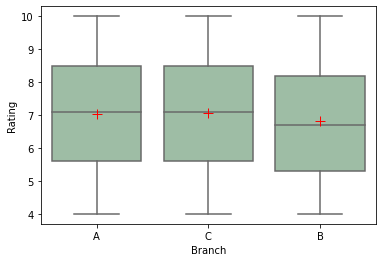

In [14]:
ax = sns.boxplot(x='Branch',
                 y='Rating',
                 data=df,
                 color='#99c2a2',
                 showmeans=True,
                 meanprops={"marker": "+",
                            "markeredgecolor": "red",
                            "markersize": "10"})

plt.show()

P-value lebih besar dari 0.05, sehingga H0 diterima.

Artinya, perbedaan rating dari cabang A, B, dan C tidak signifikan atau memiliki nilai yang sama.

## Conclusions, Assumptions, Overall Analysis

Kesimpulan yang didapat dari Milestone 01 kali ini adalah diperlukan urutan dalam menyampaikan informasi sehingga apa yang ingin disampaikan dapat diterima dengan jelas.